# Datahack

the **Spotify Future Release Tracks Popularity Prediction** competition on Kaggle is a notable machine learning challenge focused on predicting the popularity of upcoming Spotify tracks before their release. Here's a structured overview of the competition and its key aspects:


---

### **Competition Overview**
- **Objective**: Predict the **popularity score** (a continuous variable) of new tracks based on historical data and metadata.
- **Host**: Spotify, in collaboration with Kaggle.
- **Duration**: Likely held in 2023–2024 (exact dates depend on Kaggle's schedule).

---

### **Dataset Details**
1. **Features Provided**:
   - **Audio Features**: 
     - Acousticness, danceability, energy, instrumentalness, key, loudness, mode, speechiness, tempo, time signature, valence.
   - **Metadata**:
     - Artist information, release dates, genres, track names, album details.
2. **Target Variable**: 
   - **Popularity score** (ranging from 0 to 100, derived from user engagement like streams, saves, etc.).
3. **Structure**:
   - **Training Set**: Historical data with known popularity scores.
   - **Test Set**: New tracks (future releases) with unknown popularity scores.
   - **Submission Format**: Predicted popularity scores for the test set.

---

### **Key Challenges**
1. **Data Generalization**: 
   - Models must predict popularity for unseen tracks, requiring strong generalization.
2. **Feature Engineering**:
   - Creating meaningful features (e.g., artist popularity, genre trends, album-level aggregations).
3. **Evaluation Metric**:
   - **RMSE (Root Mean Squared Error)**: Measures the difference between predicted and actual popularity scores.
4. **Data Leakage**:
   - Ensuring temporal splits (e.g., training on older data, testing on newer data) to avoid overfitting.

---

### **Common Approaches**
1. **Model Selection**:
   - **Gradient Boosting Machines (GBMs)**: XGBoost, LightGBM, CatBoost.
   - **Linear Models**: Ridge/Lasso regression for baseline comparisons.
   - **Deep Learning**: Neural networks for complex feature interactions (less common due to dataset size).
2. **Feature Engineering**:
   - Aggregating artist/genre popularity from historical data.
   - Creating time-based features (e.g., release year, seasonality).
3. **Validation**:
   - **Time Series Cross-Validation**: To mimic the "future prediction" scenario.
   - **Stratified Sampling**: Ensuring balanced popularity classes in splits.

---

### **Strategies for Success**
1. **Domain Knowledge**:
   - Leveraging Spotify's public API (if allowed) to enrich metadata.
   - Understanding how audio features correlate with popularity (e.g., high energy tracks may be more popular in certain genres).
2. **Ensemble Methods**:
   - Combining multiple models (e.g., blending GBMs with linear models) to reduce variance.
3. **Hyperparameter Tuning**:
   - Optimizing model parameters via Bayesian optimization or grid search.
4. **Baseline Submissions**:
   - Using mean/median popularity as a simple benchmark.

---

### **Competition Structure**
- **Leaderboard**: 
  - **Public Leaderboard**: Based on a subset of the test data.
  - **Private Leaderboard**: Final evaluation on the full test set.
- **Prizes**: Typically include cash rewards, Kaggle points, and recognition.

---

### **Why This Competition Stands Out**
- **Real-World Impact**: Predicting music popularity has applications in marketing, playlist curation, and artist promotion.
- **Access to Spotify Data**: Rare opportunity to work with Spotify's proprietary features and metadata.
- **Creative Challenges**: Balancing technical rigor (e.g., model accuracy) with domain insights (e.g., music trends).

---

If you're participating, focus on **feature engineering**, **robust validation**, and **interpreting Spotify's audio features**. For deeper insights, explore the **Kaggle forum** for discussions on data quirks and advanced techniques. Good luck! 🎵

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



# Data import

In [90]:
cols = ["key", "Unnamed_0.2", "Unnamed_0.1", "Unnamed_0", "duration", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate", "labels", "uri"]

# df_train = pd.read_csv("278_labelled_uri_train.csv", names=cols)
df_train = pd.read_csv("278_labelled_uri_train.csv")

df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,139790,139790,139790,179067.0,0.395,0.3360,-9.003,0.0311,0.824,0.000,0.0989,0.1890,94.609,1.736780e-07,0,spotify:track:75v5io8kU6Llfg2T36zhgd
1,196225,196225,196225,392333.0,0.315,0.6110,-6.070,0.0500,0.421,0.290,0.1170,0.1480,146.476,1.274428e-07,0,spotify:track:1P1mhYegu7cnXphz3QQZdB
2,117476,117476,117476,115312.0,0.129,0.0486,-25.844,0.0493,0.970,0.923,0.1090,0.4110,199.746,4.275357e-07,3,spotify:track:7DW0XpB02S7NiWex6tl8tN
3,27767,27767,27767,149201.0,0.676,0.1360,-17.745,0.0837,0.984,0.925,0.1100,0.1890,78.227,5.609882e-07,3,spotify:track:6wmn2LNYtTowLmGG8uRNru
4,95337,95337,95337,257893.0,0.132,0.0977,-23.028,0.0399,0.920,0.812,0.1070,0.0382,69.771,1.547153e-07,3,spotify:track:5mRqGsYYMs27rV43dgVmv2


## Remove useless columns

In [91]:
df_train.drop('uri', axis=1, inplace=True)
df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,139790,139790,139790,179067.0,0.395,0.3360,-9.003,0.0311,0.824,0.000,0.0989,0.1890,94.609,1.736780e-07,0
1,196225,196225,196225,392333.0,0.315,0.6110,-6.070,0.0500,0.421,0.290,0.1170,0.1480,146.476,1.274428e-07,0
2,117476,117476,117476,115312.0,0.129,0.0486,-25.844,0.0493,0.970,0.923,0.1090,0.4110,199.746,4.275357e-07,3
3,27767,27767,27767,149201.0,0.676,0.1360,-17.745,0.0837,0.984,0.925,0.1100,0.1890,78.227,5.609882e-07,3
4,95337,95337,95337,257893.0,0.132,0.0977,-23.028,0.0399,0.920,0.812,0.1070,0.0382,69.771,1.547153e-07,3


In [92]:
df_train.drop('Unnamed: 0.2', axis=1, inplace=True)
df_train.drop('Unnamed: 0.1', axis=1, inplace=True)
df_train.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,139790,179067.0,0.395,0.3360,-9.003,0.0311,0.824,0.000,0.0989,0.1890,94.609,1.736780e-07,0
1,196225,392333.0,0.315,0.6110,-6.070,0.0500,0.421,0.290,0.1170,0.1480,146.476,1.274428e-07,0
2,117476,115312.0,0.129,0.0486,-25.844,0.0493,0.970,0.923,0.1090,0.4110,199.746,4.275357e-07,3
3,27767,149201.0,0.676,0.1360,-17.745,0.0837,0.984,0.925,0.1100,0.1890,78.227,5.609882e-07,3
4,95337,257893.0,0.132,0.0977,-23.028,0.0399,0.920,0.812,0.1070,0.0382,69.771,1.547153e-07,3


## check the labels

In [93]:
print(df_train['labels'].unique())

[0 3 1 2]


## Check label distributions

Unnamed: 0


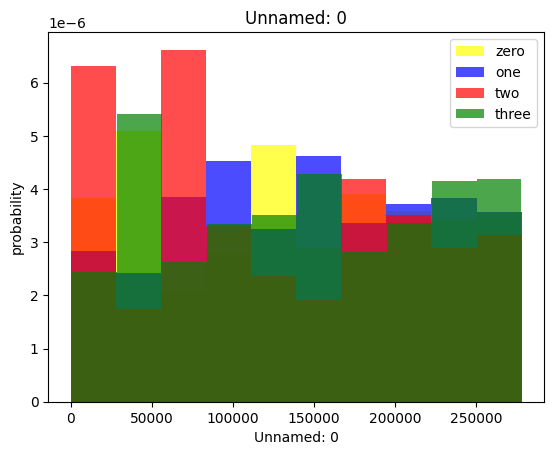

duration (ms)


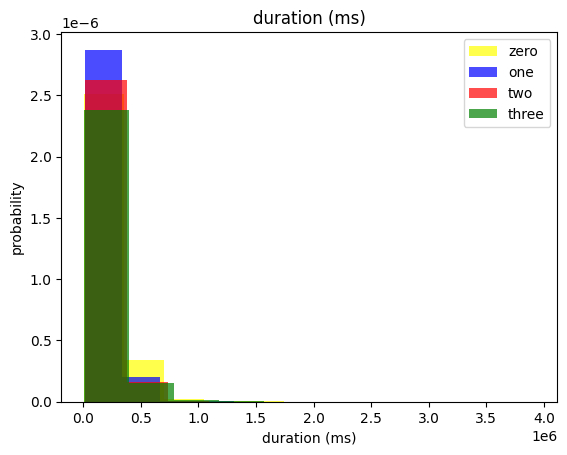

danceability


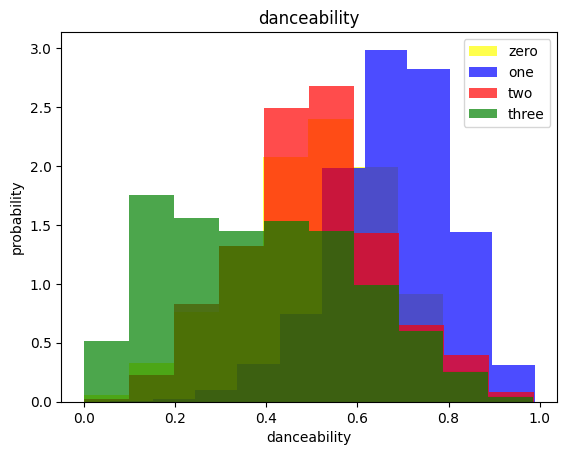

energy


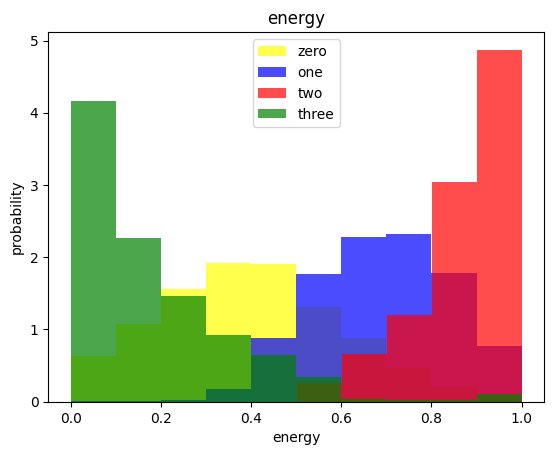

loudness


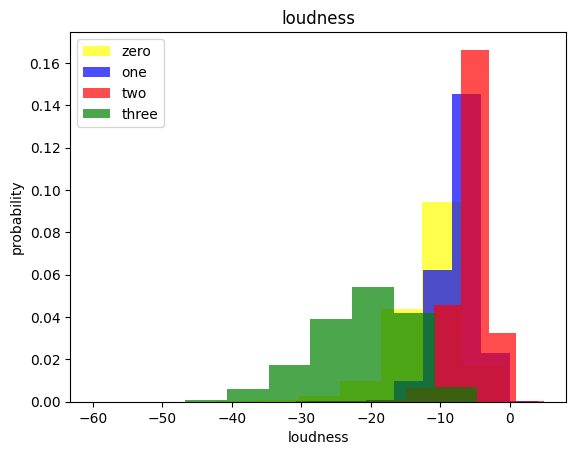

speechiness


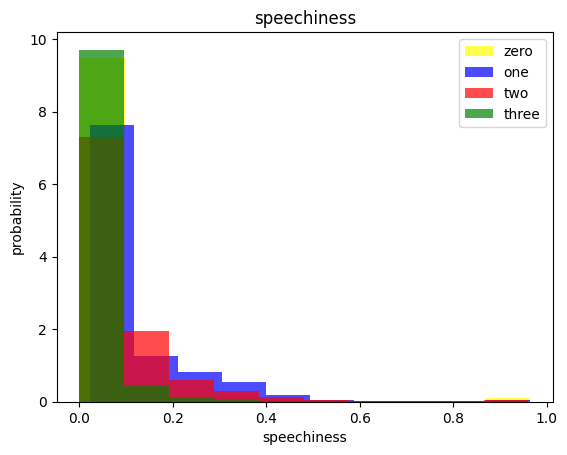

acousticness


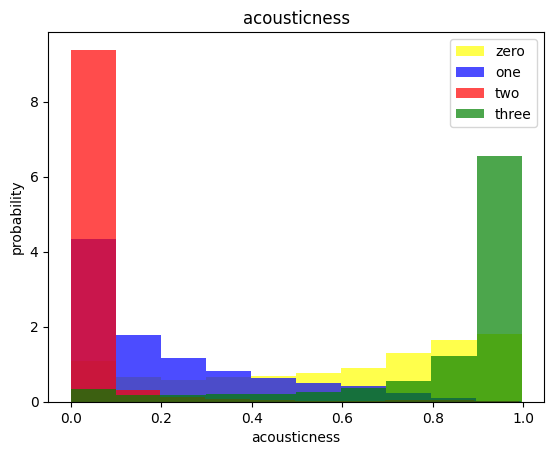

instrumentalness


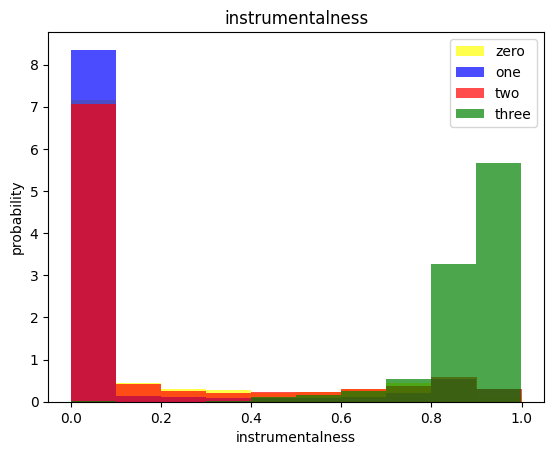

liveness


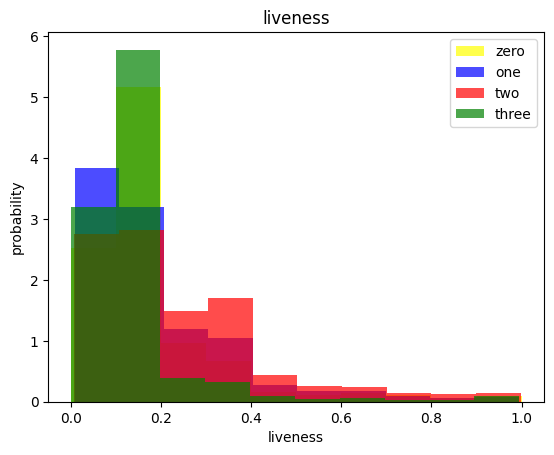

valence


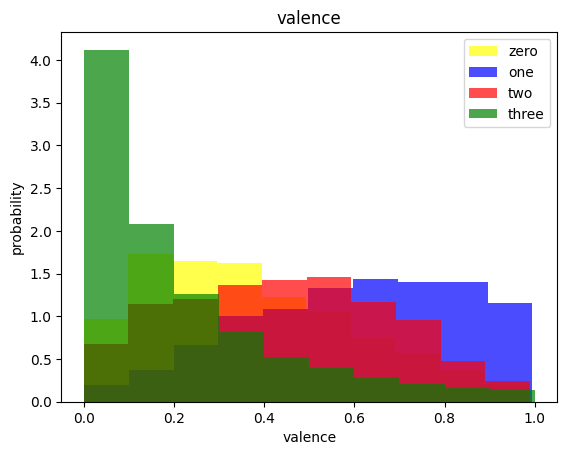

tempo


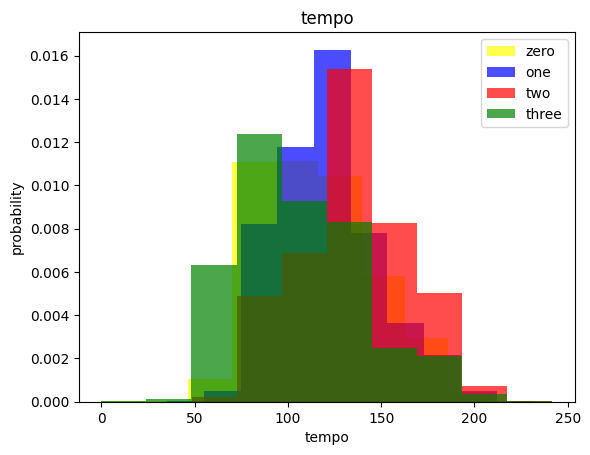

spec_rate


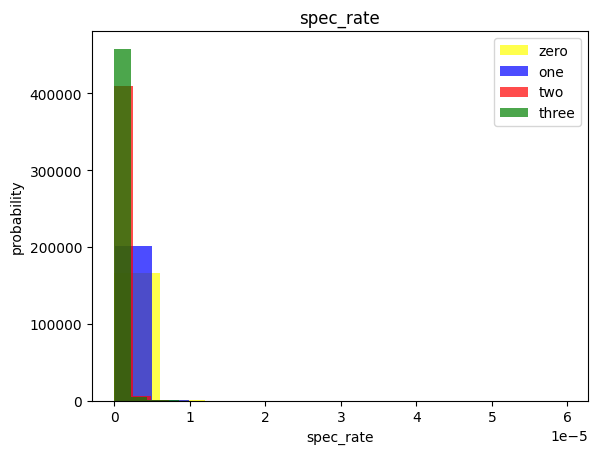

labels


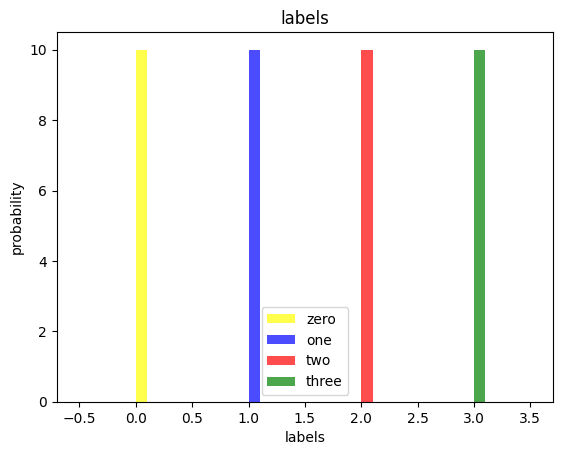

In [94]:
for label in df_train.columns:
    print(label)

    plt.hist(df_train[df_train['labels'] == 0][label], color='yellow', label='zero', alpha=0.7, density=True)
    plt.hist(df_train[df_train['labels'] == 1][label], color='blue', label='one', alpha=0.7, density=True)
    plt.hist(df_train[df_train['labels'] == 2][label], color='red', label='two', alpha=0.7, density=True)
    plt.hist(df_train[df_train['labels'] == 3][label], color='green', label='three', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Create pair plots
Create a pair plot, color-coding points by 'labels' using the 'hue' parameter

In [95]:
# sns.pairplot(data=df_train.head(), hue="labels")

# # Display the plot
# plt.show()

#### Optional Customization
You can customize the pair plot further by specifying parameters such as:

- **kind:** to change the type of plot (e.g., kind="kde" or kind="hist").
- **diag_kind:** to customize the diagonal plots.
- **palette:** to set a color palette.
- **height:** to adjust the size of the subplots.

In [96]:
# sns.pairplot(data=df_train, hue="species", kind="kde", diag_kind="hist", palette="husl", height=1.5)
# plt.show()

## Check count per label

In [97]:
print(len(df_train[df_train['labels']==0]))  #name?
print(len(df_train[df_train['labels']==1]))  #name?
print(len(df_train[df_train['labels']==2]))  #name?
print(len(df_train[df_train['labels']==3]))  #name?

65586
85125
37677
33962


## split the dataset
create train, validation and test datasets

In [98]:
# df.sample(frac=1) => shuffle the data
#train, test,  valid = np.split(df_train.sample(frac=1), [int(0.90*len(df_train)), int(0.95*len(df_train))])
df_train = df_train.sample(frac=1)
# train, test = np.split(df_train.sample(frac=1), [int(0.80*len(df_train))])
print(len(df_train))

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_train, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

# train = df_train

222350
177880
44470


## scale and oversample

In [99]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1, 1)))) # equals to: data = np.hstack((X, np.reshape(y, (len(y), 1))))
    return data, X, y


train, X_train, y_train = scale_dataset(X_train, oversample=False)
test, X_test, y_test = scale_dataset(X_test, oversample=False)
#valid, X_valid, y_valid = scale_dataset(df_train, oversample=False)

def scale_validation_dataset(dataframe):
    X = dataframe.values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X))
    return data, X


## Check balanced distribution

In [100]:
# the distribution is now balanced
print(sum(y_train==0))
print(sum(y_train==1))
print(sum(y_train==2))
print(sum(y_train==3))

52544
68017
30188
27131


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(2)
knn_model.fit(X_train, y_train)


# y_pred = knn_model.predict(X_test)
# print(y_pred)

# # results

# print(classification_report(y_test, y_pred))


KNeighborsClassifier(n_neighbors=2)

In [102]:
print("")
print("Validationset Accuracy")
print("======================")
df_valid = pd.read_csv("278_labelled_uri_test_no_label.csv", sep=";")
df_valid.head()


Validationset Accuracy


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,uri
0,117141,117141,117141,352800,0.810,0.624,-4.980,0.0367,0.5950,0.000000,0.3360,0.556,111.992,1.040000e-07,spotify:track:22h3imNbWvskfto1OBLSaX
1,201088,201088,201088,180675,0.703,0.653,-6.226,0.0790,0.2370,0.000000,0.1990,0.414,140.044,4.370000e-07,spotify:track:47IXLhp3c6mu7NqvpuhuLi
2,218334,218334,218334,210240,0.703,0.866,-4.363,0.1870,0.2920,0.000229,0.4810,0.610,128.006,8.890000e-07,spotify:track:2hLxucFzyVxjS47MFyJ9tr
3,198533,198533,198533,347827,0.617,0.817,-7.136,0.0354,0.0427,0.000003,0.1460,0.803,159.907,1.020000e-07,spotify:track:5YzzWlWfAVNvtduNDHKhHc
4,91795,91795,91795,213289,0.688,0.478,-7.040,0.2020,0.3840,0.000000,0.0975,0.444,99.998,9.470000e-07,spotify:track:557DLyFeg06jCV2cpT005C


In [103]:
df_valid.drop('uri', axis=1, inplace=True)
df_valid.drop('Unnamed: 0.2', axis=1, inplace=True)
df_valid.drop('Unnamed: 0.1', axis=1, inplace=True)
df_valid.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,117141,352800,0.810,0.624,-4.980,0.0367,0.5950,0.000000,0.3360,0.556,111.992,1.040000e-07
1,201088,180675,0.703,0.653,-6.226,0.0790,0.2370,0.000000,0.1990,0.414,140.044,4.370000e-07
2,218334,210240,0.703,0.866,-4.363,0.1870,0.2920,0.000229,0.4810,0.610,128.006,8.890000e-07
3,198533,347827,0.617,0.817,-7.136,0.0354,0.0427,0.000003,0.1460,0.803,159.907,1.020000e-07
4,91795,213289,0.688,0.478,-7.040,0.2020,0.3840,0.000000,0.0975,0.444,99.998,9.470000e-07


In [104]:
# valid, X_valid = scale_validation_dataset(df_valid)

# y_vaild_pred = knn_model.predict(X_valid)
# print(y_vaild_pred)
# # Create submission
# submission = pd.DataFrame({
#     'ID': df_valid['Unnamed: 0'],  # Use actual IDs from test data
#     'Label': y_vaild_pred
# })

# # Save
# submission.to_csv('kaggle_submission.csv', index=False)

## Naive Bayes


In [105]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# results
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.73      0.79     13042
           1       0.80      0.77      0.78     17108
           2       0.64      0.84      0.72      7489
           3       0.89      0.92      0.91      6831

    accuracy                           0.79     44470
   macro avg       0.80      0.81      0.80     44470
weighted avg       0.80      0.79      0.79     44470



## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)

# results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     13042
           1       0.81      0.85      0.83     17108
           2       0.79      0.76      0.78      7489
           3       0.93      0.94      0.94      6831

    accuracy                           0.84     44470
   macro avg       0.85      0.84      0.84     44470
weighted avg       0.84      0.84      0.84     44470



## RandomForestClassifier

In [107]:
# Initialize and train scikit-learn's RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier
# sklearn_model = RandomForestClassifier(random_state=42)
# sklearn_model.fit(X_train, y_train)
# y_pred = sklearn_model.predict(X_test)

# # results
# print(classification_report(y_test, y_pred))



## XGBoost classifier

In [108]:
# Initialize and train XGBoost classifier

# xgb_best_params = {'booster': ['gbtree'], 'max_depth': [12], 'n_estimators': [15], 'sampling_method': ['uniform'], 'tree_method': ['approx']}
import xgboost as xgb

""" objective='binary:logistic',
    learning_rate=0.1,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=15,
    use_label_encoder=False,  # Only in scikit-learn wrapper
    eval_metric='logloss' ) """

    # booster='gbtree',
    # max_depth=12,
    # n_estimators=15,
    # sampling_method='uniform',
    # tree_method='approx'

xgb_model = xgb.XGBClassifier(
    learning_rate=0.01
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# results
print(classification_report(y_test, y_pred))

matches = (y_pred == y_test)
print(f'Matches: {matches.sum()} of {len(y_pred)}')
print(f'Accuracy: {matches.sum() / len(y_test)}')

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     13042
           1       0.87      0.89      0.88     17108
           2       0.88      0.79      0.83      7489
           3       0.96      0.96      0.96      6831

    accuracy                           0.89     44470
   macro avg       0.90      0.89      0.89     44470
weighted avg       0.89      0.89      0.89     44470

Matches: 39593 of 44470
Accuracy: 0.8903305599280413


## Support Vector Machines (SVM)
the line with max distance between two groups of datapoints. sensible to outlyers

In [109]:
# from sklearn.svm import SVC
# svc_model = SVC()

# svc_model = svc_model.fit(X_train, y_train)

# y_pred = svc_model.predict(X_test)

# # results
# print(classification_report(y_test, y_pred))

## Neural Network

In [110]:

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
import tensorflow as tf
import keras

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()


def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        keras.layers.Dense(num_nodes, activation="relu", input_shape=(12,)),
        keras.layers.Dropout(dropout_prob),
        keras.layers.Dense(num_nodes, activation="relu"),
        keras.layers.Dropout(dropout_prob),
        keras.layers.Dense(4, activation="sigmoid")
    ])

    nn_model.compile(optimizer=keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test) #, validation_split=0.2  # , verbose=0
    )
    return nn_model, history


least_val_loss = float('inf')
least_loss_model = None
least_history = None
least_param = ""
epochs=200
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [16, 32, 64, 128]:
                #print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                # plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
                    least_history = history
                    least_param = f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}"
                    print(least_param)
                    print(least_val_loss)
                    print(least_loss_model)
                    #plot_history(history)
print(least_param)
print(least_val_loss)
print(least_loss_model)
plot_history(history)

y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred < 0.5).astype(int).reshape(-1,)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Epoch 1/200


c:\Users\ML4SE\.conda\envs\datahack\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)